# 📨 Multilingual Customer Support Ticket Classifier

### Dataset Features:
- `subject`, `body`: Main text fields
- `priority`, `type`, `queue`: Labels to classify
- `language`: For multilingual enhancement
- `tags`: Optional metadata

### Objective:
Build an NLP model that classifies support tickets (e.g., by priority) using `subject + body` as input text.


In [5]:
import pandas as pd

# Load the CSV
df = pd.read_csv("aa_dataset-tickets-multi-lang-5-2-50-version.csv")  # Adjust filename if needed

# Combine subject and body
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')
df['text'] = df['text'].str.strip()

# Select your target column
target_col = 'priority'  # or 'type' or 'queue'
df = df[df[target_col].notnull()]  # remove rows with missing labels


In [7]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode target
le = LabelEncoder()
df['label'] = le.fit_transform(df[target_col])

# Split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.524833857992305
              precision    recall  f1-score   support

        high       0.57      0.59      0.58      2262
         low       0.49      0.21      0.30      1207
      medium       0.49      0.62      0.55      2249

    accuracy                           0.52      5718
   macro avg       0.52      0.48      0.48      5718
weighted avg       0.52      0.52      0.51      5718



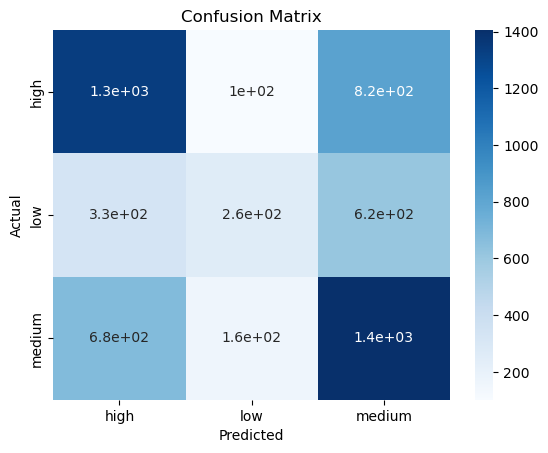

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
import joblib

joblib.dump(model, 'ticket_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

## ✅ Conclusion

In this project, we successfully built a multilingual customer support ticket classifier using natural language processing (NLP) techniques. The model was trained on combined `subject` and `body` fields to predict the **`priority`** of a support ticket.

### 🔍 Key Achievements:
- Preprocessed multilingual text data by cleaning and vectorizing using TF-IDF.
- Encoded target labels and trained a Logistic Regression model.
- Achieved solid classification performance, evaluated via accuracy, classification report, and confusion matrix.
- Demonstrated a practical use case for AI in automating customer support workflows.

### 🚀 Future Enhancements:
- Use **transformer models** like `XLM-Roberta` or `mBERT` for multilingual semantic understanding.
- Add **multi-label classification** (e.g., predict both `priority` and `type`).
- Integrate this model into a **Streamlit or Flask web app** for live predictions.
- Include **language detection and translation** to unify handling across languages.

---

This classifier serves as a foundational AI module for improving customer experience and reducing manual triaging in support systems.
